<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/A2c_DL_TC5033_AD2023_andrea_con_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Team 1:**
* Alexis Hernández Martínez A01016308
* Rigoberto Vega Escudero A01793132
* Rodrigo Rodríguez Rodríguez A01183284
* Andrea Carolina Treviño Garza A01034993

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




In [1]:
# Here we import all require libraries:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader # Convierte dataset en obj iterable de pytorch para hacer mini-batches de forma automática y mandarlos a nuestro modelo durante el proceso de entrenamiento.
from torch.utils.data import sampler # Permite hacer muestra aleatoria de los datos
import torchvision.datasets as datasets # Contiene bases de datos pre-cargadas, también nos permite cargar nuestros propios datos para generar nuestro propio modelo.
import torchvision.transforms as T # Módulo transforms para hacer transformaciones a nuestros datos.
from torchvision import models # Ya tiene diferentes modelos ya pre-entrenados.

import matplotlib.pyplot as plt
from tabulate import tabulate

### Descargar sets de datos

In [2]:
# Set the path for the CIFAR-10 dataset
DATA_PATH = './cifar10_data'  # You can change this to your desired path
NUM_TRAIN = 45000             # We select 45,000 images for the training set. 5,000 images for the validation dataser & 10,000 images for test dataset.
MINIBATCH_SIZE = 64           # And define a minibatch of 64 images.
transform_imagenet = T.Compose([ #For pre-trained model
                T.Resize(224), # Change size of images to 224x224 pixeles, because that's the size of ImageNet.
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #Normalization for each channel of the image.
            ])

# Definition of transforms, Compose() allows to have a list of transforms.
transform_cifar = T.Compose([
                  T.ToTensor(), # First the data is transform to Tensor
                  T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]) # Later Normalization is applied (Known mean & standard deviation of CIFAR10 dataset for each channel)
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, # Download from dataset, CIFAR10 dataset, save it in DATA_PATH, they are for training, we will download them,
                             transform=transform_imagenet) # Imagenet transformation will be applied.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, # Iterator for dataset, in the minibatch size
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))) # using random sampler in the range(0 , size of training set)

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, #Here train is false to take images from testing dataset of CIFAR10.
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

100%|██████████| 170498071/170498071 [00:02<00:00, 57910168.49it/s]


Extracting ./cifar10_data/cifar-10-python.tar.gz to ./cifar10_data
Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Here we can see the size of each image & label in validation dataset:
# Here you can see how to iterate the values of the dataloader, like any iterable object in python:
#It does it for each minibatch, 3 channels & images of 224x224. Y has a value for each of the images in the minibatch.
# Last minibatch has only 8 images.
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Usar GPU

In [5]:
# Validation of available GPUs:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: Cat


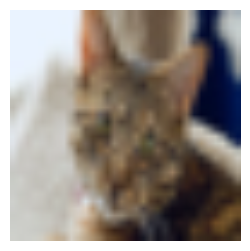

In [11]:
# Here we can display random images of the Test dataset:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck'] # List of possible classes.

# Function for displaying images:
def plot_figure(image):
    plt.figure(figsize=(3,3))  # Smaller size selected to improve clarity of image.
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader)) # Random numbers generated, considering the maximum number in test_loader dataset.
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}') # Let's read the class of the image that will be displayed.
image = test_loader.dataset[rnd_sample_idx][0] # The image of the random number position in test dataset is saved.
image = (image - image.min()) / (image.max() -image.min() ) # Min-max normalization: data is scaled in range of 0 to 1.
plot_figure(image)

### Calcular Accuracy

In [12]:
# Function for validating the accuracy of each model:
def accuracy(model, loader): # Loader: iterable object, Data Loader from Pytorch, we don't need to call anymore the funtion create_minibatches
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader: # We create a cycle for the minibatches created automatically. Similar to previously displayer "for-cycle". *enumerate not added because we don't care about the minibatch number.
            xi = xi.to(device=device, dtype = torch.float32) # Tuple of images that we need to pass to device for training.
            yi = yi.to(device=device, dtype = torch.long) # Tuple of labels from images that we need to pass to device for training.
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total # Calculus of accuracy

### **Cargar modelo pre-cargado - ResNet18**

In [13]:
# Loading the pretrained model ResNet18 (from torchvision models):
model_resnet18 = models.resnet18(pretrained=True) # We download it in the pretrained form

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


#### Exploremos el modelo

In [14]:
# Let's see the shape of resnet model parameters:
for i, w in enumerate(model_resnet18.parameters()): # Method parameters shows us all the model parameters.
    print(i, w.shape, w.requires_grad) # Attribute "requires_grad" indicates if the paremeter is trainable or not. All are true here for each layer, so they could be trained more, which would be computationally expensive

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [25]:
# Let´s see what includes the pre-trained ResNet model, we can see each layer. Last layer is Linear (fully connected), receiving 512 features and returning 1000 (# clases from imageNet dataset):
model_resnet18 # Re-train this model is hard for our limited resources

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Ajustar a nuestro modelo

In [28]:
#Adjusting pretrained model to our new model:
model_aux = nn.Sequential(*list(model_resnet18.children())) # We create auxiliary model using all layers with Module Sequential.
# We convert it to *list, passing elements like a list without being a list(like unpacked/independent). Keeping everything from original model.
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [17]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

In [18]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [19]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False # We set the trainable parameter to false to "freeze" the model & only train the last layer.

In [20]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad) # This method shows if each parameter will be trainable or not

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


### Loop de entrenamiento

In [22]:
# Function for training our model:
def train(model, optimiser, epochs=100): # We receive the model, the optimizer & epoch number.
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader): # For this time ready to go through minibatches inside the loader for the training dataset
            model.train() # We set the model to training mode.
            xi = xi.to(device=device, dtype=torch.float32) # We sent images tuple to GPU
            yi = yi.to(device=device, dtype=torch.long) # We sent images' labels tuple to GPU
            scores = model(xi) # Time to run the model.

            cost = F.cross_entropy(input= scores, target=yi) # Cost function will be calculated.

            optimiser.zero_grad() # Set gradients to zero
            cost.backward() # Retro-propagation algorithm to calculate gradients in each layer
            optimiser.step() # Optimizer Adam used

        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},') # Printing the accuracy of each epoch from validation set.

In [23]:
# Definition of our model parameters:
hidden1 = 256
hidden = 256
lr = 1e-2
epochs = 3

# Let's build our model:
model1 = nn.Sequential(model_aux,
                       nn.Flatten(), # Allows us to put our image like a vector.
                       nn.Linear(in_features=512, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [24]:
#Visualization of the content of the model1:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# Training model1:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.0505452156066895, accuracy: 0.7204,
Epoch: 1, costo: 0.5270372629165649, accuracy: 0.7514,
Epoch: 2, costo: 1.0754084587097168, accuracy: 0.7814,


In [ ]:
# Accuracy of model1:
acc_model1 = accuracy(model1, test_loader)
print(acc_model1)

0.7736


**Modelo 2 - ResNet 50**


In [ ]:
# Loading the pretrained model ResNet50:
model_resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 270MB/s]


In [ ]:
for i, w in enumerate(model_resnet50.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 1, 1]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([256, 64, 1, 1]) True
10 torch.Size([256]) True
11 torch.Size([256]) True
12 torch.Size([256, 64, 1, 1]) True
13 torch.Size([256]) True
14 torch.Size([256]) True
15 torch.Size([64, 256, 1, 1]) True
16 torch.Size([64]) True
17 torch.Size([64]) True
18 torch.Size([64, 64, 3, 3]) True
19 torch.Size([64]) True
20 torch.Size([64]) True
21 torch.Size([256, 64, 1, 1]) True
22 torch.Size([256]) True
23 torch.Size([256]) True
24 torch.Size([64, 256, 1, 1]) True
25 torch.Size([64]) True
26 torch.Size([64]) True
27 torch.Size([64, 64, 3, 3]) True
28 torch.Size([64]) True
29 torch.Size([64]) True
30 torch.Size([256, 64, 1, 1]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([128, 256, 1, 1]) True
34 torch.Size([128]) True

In [ ]:
model_resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model_aux = nn.Sequential(*list(model_resnet50.children()))
model_aux = nn.Sequential(*list(model_resnet50.children())[:-1])
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
# Definition of our 2nd model parameters:
hidden2 = 256
hidden = 256
lr2 = 1e-2
epochs2 = 3

# Let's build our 2nd model:
model2 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=2048, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model2.parameters(), lr=lr2, betas=(0.9, 0.999))

In [ ]:
# Visualization of the content of the model2:
model2

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
# Training model2:
train(model2, optimiser, epochs2)

Epoch: 0, costo: 0.6660609841346741, accuracy: 0.7044,
Epoch: 1, costo: 0.5762112140655518, accuracy: 0.7598,
Epoch: 2, costo: 1.3962100744247437, accuracy: 0.7956,


In [ ]:
#Accuracy of model2:
acc_model2 = accuracy(model2, test_loader)
print(acc_model2)

0.7906

**Modelo 3 - DenseNet169**

In [ ]:
# Loading the pretrained model DenseNet_169:
model_densenet169=models.densenet169(pretrained=True)

In [ ]:
for i, w in enumerate(model_densenet169.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64]) True
4 torch.Size([64]) True
5 torch.Size([128, 64, 1, 1]) True
6 torch.Size([128]) True
7 torch.Size([128]) True
8 torch.Size([32, 128, 3, 3]) True
9 torch.Size([96]) True
10 torch.Size([96]) True
11 torch.Size([128, 96, 1, 1]) True
12 torch.Size([128]) True
13 torch.Size([128]) True
14 torch.Size([32, 128, 3, 3]) True
15 torch.Size([128]) True
16 torch.Size([128]) True
17 torch.Size([128, 128, 1, 1]) True
18 torch.Size([128]) True
19 torch.Size([128]) True
20 torch.Size([32, 128, 3, 3]) True
21 torch.Size([160]) True
22 torch.Size([160]) True
23 torch.Size([128, 160, 1, 1]) True
24 torch.Size([128]) True
25 torch.Size([128]) True
26 torch.Size([32, 128, 3, 3]) True
27 torch.Size([192]) True
28 torch.Size([192]) True
29 torch.Size([128, 192, 1, 1]) True
30 torch.Size([128]) True
31 torch.Size([128]) True
32 torch.Size([32, 128, 3, 3]) True
33 torch.Size([224]) True
34 torch.Size([224]) 

In [ ]:
model_densenet169

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
model_aux = nn.Sequential(*list(model_densenet169.children()))
model_aux = nn.Sequential(*list(model_densenet169.children())[:-1])
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
# Definition of our 3rd model parameters:
hidden3 = 256
hidden = 256
lr3 = 1e-2
epochs3 = 3

# Let's build our 3rd model:
model3 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=2048, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model3.parameters(), lr=lr3, betas=(0.9, 0.999))

In [ ]:
# Visualization of the content of the model3:
model3

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
# Training model3:
train(model3, optimiser, epochs3)

Epoch: 0, costo: 0.5482063889503479, accuracy: 0.7364,
Epoch: 1, costo: 1.6861939430236816, accuracy: 0.791,
Epoch: 2, costo: 1.617038369178772, accuracy: 0.7776,


In [ ]:
#Accuracy of model3:
acc_model3 = accuracy(model3, test_loader)
print(acc_model3)

0.7797

In [ ]:
# Here we can compare the accuracy results from our 3 models with pre-trained data:
data = [['Model 1', 'ResNet18', 0.7736], ['Model 2', 'ResNet50', 0.7906], ['Model 3', 'DenseNet169', 0.7797]]
print(tabulate(data, headers = ["Models", "Pre-Trained Model", "Accuracy"]))

Models    Pre-Trained Model      Accuracy
--------  -------------------  ----------
Model 1   ResNet18                 0.7736
Model 2   ResNet50                 0.7906
Model 3   DenseNet169              0.7797


## **Conclusions:**
* The main challenge we faced during this activity is that training time for this type of pre-trained models take several hours to complete. For solving this issue, each of us tried different models separately until we got the 3 accuracy results required from the 3 pre-trained models.
* Other issues we had were to know & understand the parameters and the amount of objects to evaluate in each model.
* Overall we can see that the pre-trained model ResNet50 got better accuracy results in comparison with the other 2 (ResNet18 & DenseNet169), but not significantly higher in comparison with the accuracy results from simpler CNN models we created in activity "A2b DL TC5033 AD2023".

## **Bibliography:**
* Model Zoo — PyTorch/Serve master documentation. (n.d.). https://pytorch.org/serve/model_zoo.html
* Pepe Cantoral, Ph.D. (2022c, April 27). ¿Qué es ResNet? – Redes Neuronales Residuales [Video]. YouTube. https://www.youtube.com/watch?v=gKCuWBpg1bU
* Pepe Cantoral, Ph.D. (2022b, January 15). Red Neuronal Convolucional en PyTorch / Tutorial de PyTorch para CNN - Parte 1 [Video]. YouTube. https://www.youtube.com/watch?v=yUB9JQQVtoU
* Pepe Cantoral, Ph.D. (2022d, January 18). Red Neuronal Convolucional en PyTorch con Batch Normalization/Tutorial de PyTorch para CNNs -Parte 2 [Video]. YouTube. https://www.youtube.com/watch?v=NLrQZwnWjvI